In [1]:
import pandas as pd

In [2]:
weather = pd.read_csv("Chennai_1990_2022_Madras.csv", index_col="time")

In [3]:
weather

,tavg,tmin,tmax,prcp
time,,,,
01-01-1990,25.2,22.8,28.4,0.5
02-01-1990,24.9,21.7,29.1,0.0
03-01-1990,25.6,21.4,29.8,0.0
04-01-1990,25.7,NaN,28.7,0.0
05-01-1990,25.5,20.7,28.4,0.0
...,...,...,...,...
21-07-2022,28.4,24.5,32.8,21.1
22-07-2022,27.8,24.6,32.2,22.1
23-07-2022,27.4,24.7,32.6,18.6


In [4]:
weather.isnull().sum()/11894

tavg    0.002270
tmin    0.259290
tmax    0.085673
prcp    0.410795
dtype: float64

In [5]:
weather.apply(pd.isnull).sum()/weather.shape[0]

tavg    0.002270
tmin    0.259290
tmax    0.085673
prcp    0.410795
dtype: float64

In [6]:
weather.shape[0]

11894

In [7]:
core_weather = weather[["prcp","tmin","tmax"]].copy()

In [8]:
core_weather.columns = ["precip","temp_min", "temp_max"]

In [9]:
core_weather

,precip,temp_min,temp_max
time,,,
01-01-1990,0.5,22.8,28.4
02-01-1990,0.0,21.7,29.1
03-01-1990,0.0,21.4,29.8
04-01-1990,0.0,NaN,28.7
05-01-1990,0.0,20.7,28.4
...,...,...,...
21-07-2022,21.1,24.5,32.8
22-07-2022,22.1,24.6,32.2
23-07-2022,18.6,24.7,32.6


In [10]:
core_weather["temp_max"].value_counts()

35.0    245
36.0    243
34.0    231
30.0    226
31.0    217
       ... 
44.3      1
44.6      1
23.8      1
24.7      1
24.3      1
Name: temp_max, Length: 201, dtype: int64

In [11]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_min,temp_max
time,,,
19-02-1990,NaN,25.2,32.6
09-03-1990,NaN,25.2,32.4
10-03-1990,NaN,24.4,29.8
11-03-1990,NaN,23.5,30.7
19-03-1990,NaN,22.9,32.4
...,...,...,...
28-12-2020,NaN,21.0,30.0
29-12-2020,NaN,23.4,30.0
30-12-2020,NaN,24.0,29.4


In [12]:
core_weather["precip"].value_counts()

0.0      4149
0.5       247
0.3       222
1.0       163
2.0       143
         ... 
278.9       1
17.3        1
61.5        1
79.0        1
18.6        1
Name: precip, Length: 337, dtype: int64

In [13]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [14]:
core_weather[pd.isnull(core_weather["temp_max"])]

,precip,temp_min,temp_max
time,,,
29-01-1990,0.0,20.2,NaN
04-02-1990,31.0,NaN,NaN
05-02-1990,0.0,18.9,NaN
13-02-1990,0.0,NaN,NaN
15-02-1990,0.0,NaN,NaN
...,...,...,...
02-02-2018,0.0,17.6,NaN
27-03-2018,0.0,24.4,NaN
23-04-2018,0.0,27.7,NaN


In [15]:
core_weather = core_weather.fillna(method="ffill")

In [16]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip      0.0
temp_min    0.0
temp_max    0.0
dtype: float64

In [17]:
core_weather.dtypes

precip      float64
temp_min    float64
temp_max    float64
dtype: object

In [18]:
core_weather.index

Index(['01-01-1990', '02-01-1990', '03-01-1990', '04-01-1990', '05-01-1990',
       '06-01-1990', '07-01-1990', '08-01-1990', '09-01-1990', '10-01-1990',
       ...
       '16-07-2022', '17-07-2022', '18-07-2022', '19-07-2022', '20-07-2022',
       '21-07-2022', '22-07-2022', '23-07-2022', '24-07-2022', '25-07-2022'],
      dtype='object', name='time', length=11894)

In [19]:
core_weather.index

Index(['01-01-1990', '02-01-1990', '03-01-1990', '04-01-1990', '05-01-1990',
       '06-01-1990', '07-01-1990', '08-01-1990', '09-01-1990', '10-01-1990',
       ...
       '16-07-2022', '17-07-2022', '18-07-2022', '19-07-2022', '20-07-2022',
       '21-07-2022', '22-07-2022', '23-07-2022', '24-07-2022', '25-07-2022'],
      dtype='object', name='time', length=11894)

In [20]:
core_weather.index = pd.to_datetime(core_weather.index)

C:\Users\train\AppData\Local\Temp\ipykernel_7908\3501870966.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  core_weather.index = pd.to_datetime(core_weather.index)


In [21]:
core_weather.index.year

Int64Index([1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='time', length=11894)

<Axes: xlabel='time'>

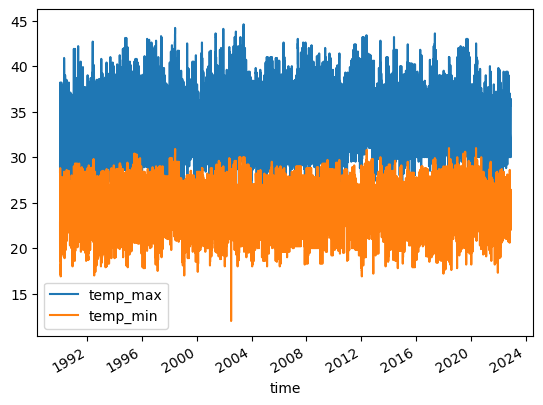

In [22]:
core_weather[["temp_max","temp_min"]].plot()

<Axes: xlabel='time'>

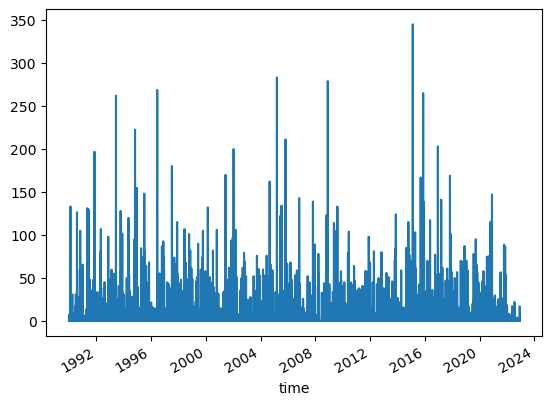

In [23]:
core_weather["precip"].plot()

In [24]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [25]:
core_weather

,precip,temp_min,temp_max,target
time,,,,
1990-01-01,0.5,22.8,28.4,29.1
1990-02-01,0.0,21.7,29.1,29.8
1990-03-01,0.0,21.4,29.8,28.7
1990-04-01,0.0,21.4,28.7,28.4
1990-05-01,0.0,20.7,28.4,26.1
...,...,...,...,...
2022-07-21,21.1,24.5,32.8,32.2
2022-07-22,22.1,24.6,32.2,32.6
2022-07-23,18.6,24.7,32.6,33.3


In [26]:
core_weather = core_weather.iloc[:-1,:].copy()

In [27]:
core_weather

,precip,temp_min,temp_max,target
time,,,,
1990-01-01,0.5,22.8,28.4,29.1
1990-02-01,0.0,21.7,29.1,29.8
1990-03-01,0.0,21.4,29.8,28.7
1990-04-01,0.0,21.4,28.7,28.4
1990-05-01,0.0,20.7,28.4,26.1
...,...,...,...,...
2022-07-20,9.3,26.2,33.0,32.8
2022-07-21,21.1,24.5,32.8,32.2
2022-07-22,22.1,24.6,32.2,32.6


In [28]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha = 1)

In [29]:
predictors = ["precip","temp_min","temp_max"]

In [30]:
train = core_weather.loc[:"2020-12-31"]

In [31]:
test = core_weather.loc["2021-01-01":  ]

In [32]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=1)

In [33]:
predictions = reg.predict(test[predictors])

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
mean_absolute_error(test["target"], predictions)

0.8331920991898316

In [36]:
combined = pd.concat([test["target"], pd.Series(predictions, index = test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [37]:
combined

,actual,predictions
time,,
2021-01-01,25.4,30.214949
2021-02-01,27.8,26.663202
2021-03-01,28.6,28.654609
2021-04-01,26.8,29.231458
2021-05-01,28.6,27.900393
...,...,...
2022-07-20,32.8,33.418499
2022-07-21,32.2,33.022406
2022-07-22,32.6,32.539623


<Axes: xlabel='time'>

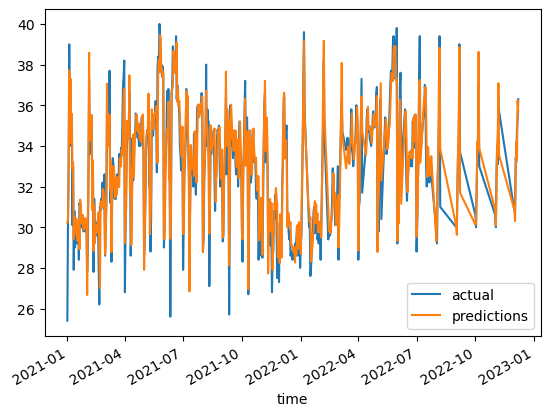

In [38]:
combined.plot()

In [39]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [40]:
core_weather

,precip,temp_min,temp_max,target,month_max
time,,,,,
1990-01-01,0.5,22.8,28.4,29.1,NaN
1990-02-01,0.0,21.7,29.1,29.8,NaN
1990-03-01,0.0,21.4,29.8,28.7,NaN
1990-04-01,0.0,21.4,28.7,28.4,NaN
1990-05-01,0.0,20.7,28.4,26.1,NaN
...,...,...,...,...,...
2022-07-20,9.3,26.2,33.0,32.8,33.990000
2022-07-21,21.1,24.5,32.8,32.2,33.973333
2022-07-22,22.1,24.6,32.2,32.6,33.930000


In [41]:
core_weather["month_day_max"] = core_weather["month_max"]/core_weather["temp_max"]

In [42]:
core_weather["max_min"] = core_weather["temp_max"]/core_weather["temp_min"]

In [43]:
predictors = ["precip","temp_min","temp_max" ]

In [44]:
core_weather = core_weather.iloc[30:,:].copy()

In [45]:
core_weather.head()

,precip,temp_min,temp_max,target,month_max,month_day_max,max_min
time,,,,,,,
1990-01-31,0.0,20.1,29.8,30.0,29.686667,0.996197,1.482587
1990-01-02,0.0,18.6,30.0,29.6,29.716667,0.990556,1.612903
1990-02-02,0.0,19.1,29.6,30.1,29.710000,1.003716,1.549738
1990-03-02,0.0,19.4,30.1,30.1,29.756667,0.988594,1.551546
1990-04-02,31.0,19.4,30.1,30.1,29.813333,0.990476,1.551546


In [46]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":  ]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index = test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [47]:
error, combined = create_predictions(predictors, core_weather, reg)

In [48]:
error

0.8332756080159675

<Axes: xlabel='time'>

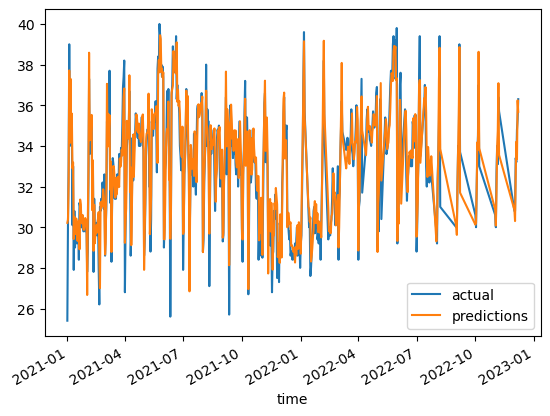

In [49]:
combined.plot()

In [50]:
#predictive system
import numpy as np
precip = float(input("enter PRECIP"))
temp_min = float(input("enter Temp_min"))
temp_max = float(input("enter Temp_max"))

features =(precip, temp_max, temp_min)
array = np.array(features)
reshaped = array.reshape(1,-1)
answer = reg.predict(reshaped)
print("predicted target",answer)


enter PRECIP0
enter Temp_min19.1
enter Temp_max29.6
predicted target [22.34643893]


C:\Users\train\anaconda3\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
